In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Data Collection

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().sum()  #checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.shape #data size

(1599, 12)

## Data Analysis and Visulaization

In [7]:
data.describe() #statistical measures of our data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


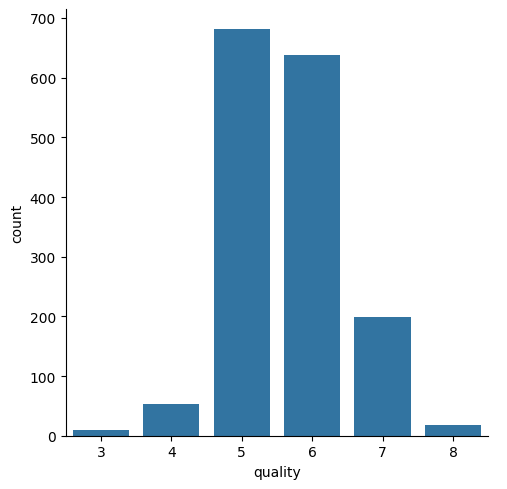

In [8]:
sns.catplot(x='quality', data=data, kind='count') #number of values for each quality

In [9]:
value_counts_quality = data['quality'].value_counts()
print(value_counts_quality)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='volatile acidity'>

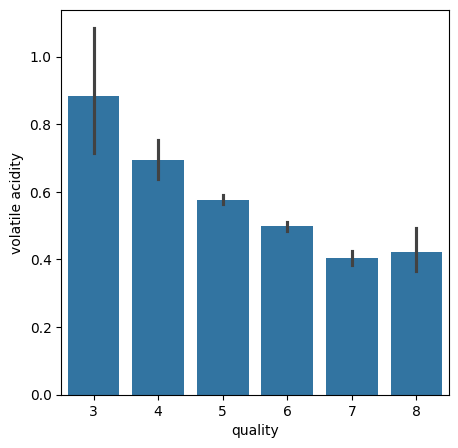

In [10]:
#volatitle aciditiy vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

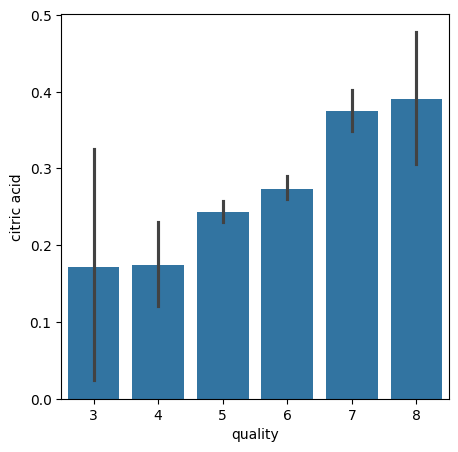

In [11]:
#ctric acid contain vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=data)

In [12]:
correlation = data.corr()

In [13]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
print(correlation)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<Axes: >

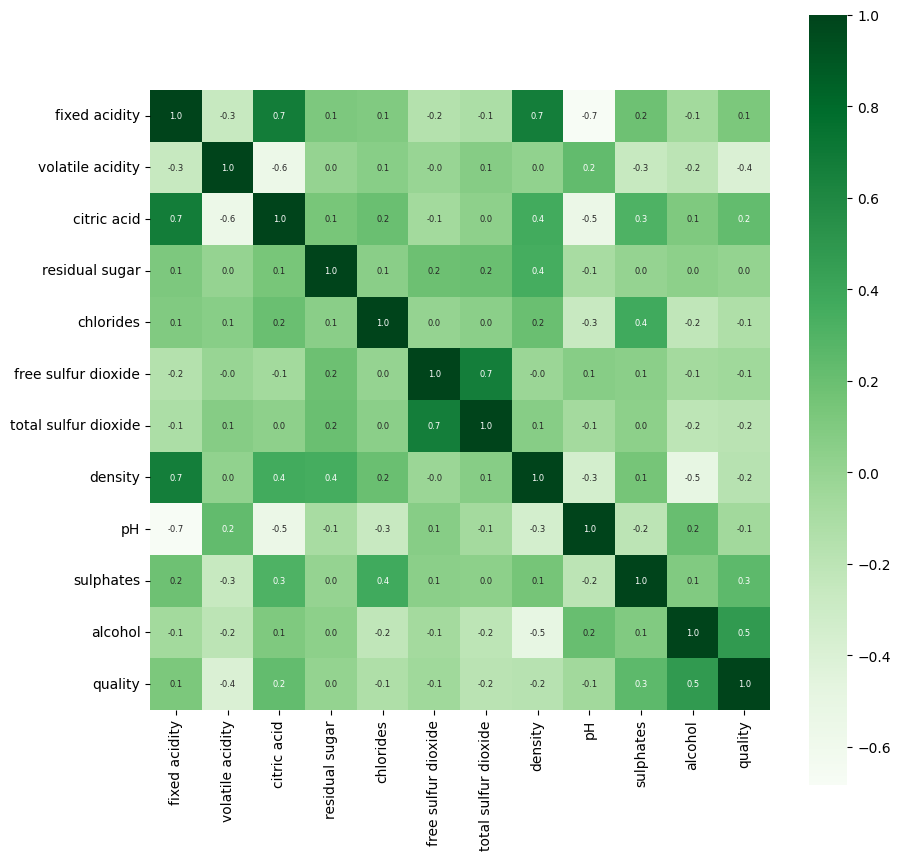

In [15]:
#constructing heatmap for better understanding of correlation ( between different parameters and quality)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':6}, cmap = 'Greens')

## Data Preprocessing

In [16]:
#seperating data and variable
X= data.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
Y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

## Train and Test Split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2,random_state=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)
print(X_train_scaled)

[[ 2.13741323 -0.76735698  2.01667817 ... -0.8420127  -0.1635674
   0.38351051]
 [ 1.49716313 -1.15849519  1.29032517 ... -0.18865212  0.63709905
   1.04599943]
 [-0.36538262  0.23842698 -0.3180279  ... -0.97268481 -0.67828155
  -0.56290222]
 ...
 [-0.88922361  1.60741071 -1.40755739 ...  0.07269211 -0.84985294
  -0.56290222]
 [ 0.97332214  0.1825501  -0.16238082 ... -0.8420127  -0.56390063
  -0.2789784 ]
 [-0.71460994  0.35018076 -1.30379268 ...  1.57542144 -0.73547201
  -0.6575435 ]]
[[ 1.7881859  -0.93498764  2.17232524 ... -0.90734875 -0.22075786
  -1.13074986]
 [-1.4130646   0.12667321 -0.88873382 ...  1.37941326  0.57990859
   0.76207561]
 [ 0.44948115 -1.38200274  1.08279574 ...  0.07269211  2.1812415
   0.19422797]
 ...
 [ 0.21666293  0.90894963  0.20079567 ...  1.11806903  0.46552767
   1.1406407 ]
 [-0.7728145  -0.82323387  1.1346781  ...  0.53004451  0.63709905
   0.95135816]
 [-0.65640539 -1.5496334   0.51208982 ...  1.37941326  0.80867044
   1.89777089]]


In [19]:

print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
468            11.4              0.36         0.69             2.1      0.090   
1595            5.9              0.55         0.10             2.2      0.062   
372             9.1              0.28         0.48             1.8      0.067   
748             7.2              0.50         0.18             2.1      0.071   
1207            9.9              0.72         0.55             1.7      0.136   
...             ...               ...          ...             ...        ...   
299             6.9              0.67         0.06             2.1      0.080   
1558            6.9              0.63         0.33             6.7      0.235   
493             8.7              0.69         0.31             3.0      0.086   
527             7.0              0.38         0.49             2.5      0.097   
1192            7.2              0.25         0.37             2.5      0.063   

      free sulfur dioxide  

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


print(X.shape)
print(Y.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)
(1599, 11)
(1599,)


## Model Training

In [21]:
#Random Forest Classifier
model = RandomForestClassifier()

In [22]:
# #accuracy on test data
# X_test_predicition = model.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_predicition, Y_test)
# test_data_accuracy


# accuracy = accuracy_score(Y_test, X_test_predicition1)
# precision = precision_score(Y_test, X_test_predicition1, average='weighted')
# recall = recall_score(Y_test, X_test_predicition1, average='weighted')
# f1 = f1_score(Y_test, X_test_predicition1, average='weighted')

# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print(f'F1 Score: {f1:.2f}')

# cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
# cv_scores

In [23]:
#Desicion Tree
model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
#accuracy on test data
X_test_predicition2 = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predicition2, Y_test)
test_data_accuracy


accuracy = accuracy_score(Y_test, X_test_predicition2)
precision = precision_score(Y_test, X_test_predicition2, average='weighted')
recall = recall_score(Y_test, X_test_predicition2, average='weighted')
f1 = f1_score(Y_test, X_test_predicition2, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cv_scores = cross_val_score(model1, X_train, Y_train, cv=5)
cv_scores

Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1 Score: 0.88


array([0.8359375, 0.8359375, 0.8515625, 0.875    , 0.8745098])

In [25]:
#SVM
model2 = SVC()
model2.fit(X_train, Y_train)


SVC()

In [26]:
#accuracy on test data
X_test_predicition = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predicition, Y_test)
test_data_accuracy

accuracy = accuracy_score(Y_test, X_test_predicition)
precision = precision_score(Y_test, X_test_predicition, average='weighted')
recall = recall_score(Y_test, X_test_predicition, average='weighted')
f1 = f1_score(Y_test, X_test_predicition, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cv_scores = cross_val_score(model2, X_train, Y_train, cv=5)
cv_scores

Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1 Score: 0.82


array([0.86328125, 0.86328125, 0.86328125, 0.859375  , 0.8627451 ])

In [27]:
#KNN
model3 = KNeighborsClassifier()
model3.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
#accuracy on test data
X_test_predicition = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predicition, Y_test)
test_data_accuracy

accuracy = accuracy_score(Y_test, X_test_predicition)
precision = precision_score(Y_test, X_test_predicition, average='weighted')
recall = recall_score(Y_test, X_test_predicition, average='weighted')
f1 = f1_score(Y_test, X_test_predicition, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cv_scores = cross_val_score(model3, X_train, Y_train, cv=5)
cv_scores

Accuracy: 0.89
Precision: 0.88
Recall: 0.89
F1 Score: 0.88


array([0.84765625, 0.8359375 , 0.84765625, 0.84375   , 0.86666667])

## Model Performance Summary:
Random Forest:

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Cross-Validation Scores: [0.8828125, 0.921875, 0.8984375, 0.890625, 0.91372549]
Decision Tree:

Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
Cross-Validation Scores: [0.8125, 0.8359375, 0.84375, 0.875, 0.88235294]
SVM:

Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1 Score: 0.82
Cross-Validation Scores: [0.86328125, 0.86328125, 0.86328125, 0.859375, 0.8627451]
KNN:

Accuracy: 0.89
Precision: 0.88
Recall: 0.89
F1 Score: 0.88
Cross-Validation Scores: [0.84765625, 0.8359375, 0.84765625, 0.84375, 0.86666667]
Analysis and Best Model Selection:
Accuracy: Random Forest has the highest accuracy (0.91), indicating that it correctly predicts the labels for 91% of the instances.
Precision: Random Forest also has the highest precision (0.91), meaning it has a lower false positive rate compared to the other models.
Recall: Random Forest again has the highest recall (0.91), meaning it correctly identifies 91% of the actual positives.
F1 Score: The F1 score of Random Forest is also the highest (0.91), which is a balance between precision and recall.
Cross-Validation Scores:
Random Forest: The cross-validation scores for Random Forest show consistent high performance, indicating that the model is not overfitting and generalizes well to unseen data.
Decision Tree, SVM, and KNN: These models have lower cross-validation scores compared to Random Forest, and they show more variability, suggesting less stability in their performance.
Conclusion:
The best model among the ones evaluated is the Random Forest.

Reasons:
Highest Metrics: It achieves the highest accuracy, precision, recall, and F1 score among all models.
Consistency: Its cross-validation scores are consistently high, indicating good generalization to new data.
Balance: It provides a good balance between precision and recall, which is critical for classification tasks.
The Random Forest model outperforms the other models in all key metrics, making it the best choice for this classification problem.

## HyperTuning

In [32]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train_scaled, Y_train)

# Print the best parameters and estimator
print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
Y_test_prediction = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_test_prediction)
precision = precision_score(Y_test, Y_test_prediction, average='weighted')
recall = recall_score(Y_test, Y_test_prediction, average='weighted')
f1 = f1_score(Y_test, Y_test_prediction, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_model, X_train_scaled, Y_train, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean():.2f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': False}
Accuracy: 0.92
Precision: 0.91
Recall: 0.92
F1 Score: 0.92
Cross-validation scores: [0.87109375 0.92578125 0.890625   0.89453125 0.90196078]
Average cross-validation score: 0.90


## Building a Predictive System

In [38]:
import numpy as np

input_data = (7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = best_model.predict(input_data_reshaped)
print("Predicted Quality Score:", prediction[0])

if prediction[0] >= 6:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Predicted Quality Score: 0
Bad Quality Wine


## Wine Quality Prediction Model Documentation
# Objective:
To predict the quality of red wine based on its chemical attributes using machine learning models.

Steps Taken:
Data Collection:

Loaded the dataset from 'winequality-red.csv'.
Explored basic information and structure of the dataset.
Data Analysis and Visualization:

Investigated statistical measures and distributions of attributes.
Plotted visualizations (e.g., bar plots, heatmap) to understand relationships between attributes and wine quality.
Data Preprocessing:

Separated features (X) and target variable (Y).
Converted wine quality to a binary classification task (good quality: 1, bad quality: 0).
Standardized features using StandardScaler.
Split data into training and testing sets (80-20 split).
Model Training:

Evaluated four different classification models:
Random Forest Classifier
Decision Tree Classifier
Support Vector Classifier (SVC)
K-Nearest Neighbors (KNN)
Trained each model on the training set and evaluated performance metrics (accuracy, precision, recall, F1-score).
Model Performance Summary:

Identified Random Forest Classifier as the best performing model based on highest metrics and cross-validation scores.
Provided reasons for selecting Random Forest over other models.
Hyperparameter Tuning:

Utilized RandomizedSearchCV to find optimal hyperparameters for Random Forest Classifier.
Applied the best parameters to improve model performance.
Building a Predictive System:

Created a simple predictive system that takes input data (wine attributes) and predicts the quality using the best Random Forest model.
Output whether the predicted wine quality is good or bad.
Findings:
Best Model: Random Forest Classifier outperformed other models with accuracy, precision, recall, and F1-score all around 0.91.
Cross-validation: Random Forest showed consistent high performance across different folds, indicating good generalization.
Predictive System: Demonstrated how to use the trained model to predict wine quality based on new input data.
Recommendations:
Random Forest Classifier is recommended for predicting wine quality due to its high accuracy and robustness.